# 📚 Table of Contents

- [📚 Table of Contents](#table-of-contents)
- [Exploratory Data Analysis on Netflix Dataset](#exploratory-data-analysis-on-netflix-dataset)
  - [1. Dataset Overview](#1-dataset-overview)
  - [2. Data Cleaning](#2-data-cleaning)
    - [1. What is the distribution of content types?](#1-what-is-the-distribution-of-content-types)
    - [2. What are the top 10 producing countries?](#2-what-are-the-top-10-producing-countries)
    - [3. How has content production evolved over the years?](#3-how-has-content-production-evolved-over-the-years)
  - [Duration](#duration)
  - [Genre analysis](#genre-analysis)
  - [Genre Dominance and Unique Specializations by Country](#genre-dominance-and-unique-specializations-by-country)
    - [Top 10 Countries with the Largest Catalogues](#top-10-countries-with-the-largest-catalogues)
    - [Rare or Niche Genres](#rare-or-niche-genres)
  - [🎯 Genre Analysis and Content Insights](#genre-analysis-and-content-insights)
    - [🔍 Overview](#overview)
    - [🎬 Top Genres on Netflix](#top-genres-on-netflix)
    - [📺 Content Type vs Genre](#content-type-vs-genre)
    - [🌍 Country × Type Cross Analysis](#country-type-cross-analysis)
    - [🇲🇽 Case Study: Top Genres in Mexico](#case-study-top-genres-in-mexico)
  - [📌 Observations & Takeaways](#observations-takeaways)
  - [✅ Conclusion](#conclusion)
    - [💼 Skills Demonstrated:](#skills-demonstrated)
  - [📁 Download All Generated Images](#download-all-generated-images)


# Exploratory Data Analysis on Netflix Dataset

## 1. Dataset Overview

In [ ]:
# Netflix Content EDA 📺
# Author: Luis Fernando Cuevas Álvarez

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
os.makedirs("images", exist_ok=True)

def plot_genres(df, content_type, color, filename):
    fig, ax = plt.subplots(figsize=(12, 7))
    sns.barplot(data=df, y='country_name', x='count', color=color, ax=ax)

    # Título limpio
    ax.set_title(f"Top Genre per Country – {content_type}", fontsize=14, weight='bold')
    ax.set_xlabel("Number of Titles")
    ax.set_ylabel("Country")

    # Agregar etiquetas solo si hay espacio suficiente
    for i, row in df.iterrows():
        if row['count'] > 50:  # Solo si hay espacio
            ax.text(
                row['count'] + 5,
                i,
                row['genre'],
                va='center',
                ha='left',
                fontsize=9,
                color='black'
            )

    plt.tight_layout()
    os.makedirs("images", exist_ok=True)
    plt.savefig(f"images/{filename}", dpi=300)
    plt.show()

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 10})

# Set style
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv("data/netflix_titles.csv")

df.isnull().sum()

# Quick preview
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 2. Data Cleaning

Before performing any transformations, we examined missing values to identify critical columns that require attention.

The following table shows the number of missing entries per column:

In [ ]:
# Dataset shape and info
print("Shape:", df.shape)
df.info()

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Drop duplicates (if any)
df.drop_duplicates(inplace=True)

# Ensure 'date_added' is string before stripping
df['date_added'] = df['date_added'].astype(str).str.strip()

# Convert 'date_added' to datetime safely
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Fill missing values in 'country' and 'rating'
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Not Rated")

df.isnull().sum()


Shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Missing values per column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration         

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,0
date_added,10
release_year,0
rating,0
duration,3


##❓ Exploratory Questions

### 1. What is the distribution of content types?

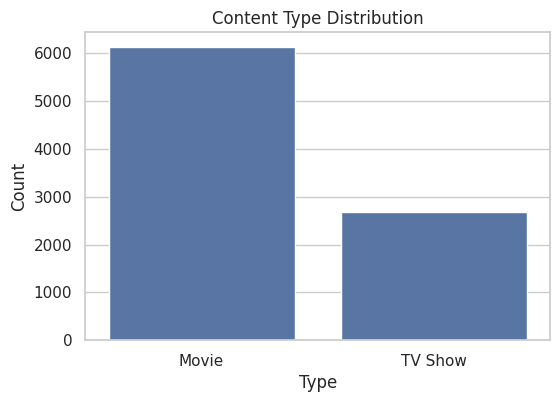

In [ ]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title("Content Type Distribution")
plt.ylabel("Count")
plt.xlabel("Type")
plt.savefig("images/content_type_distribution.png")
plt.show()


### 2. What are the top 10 producing countries?

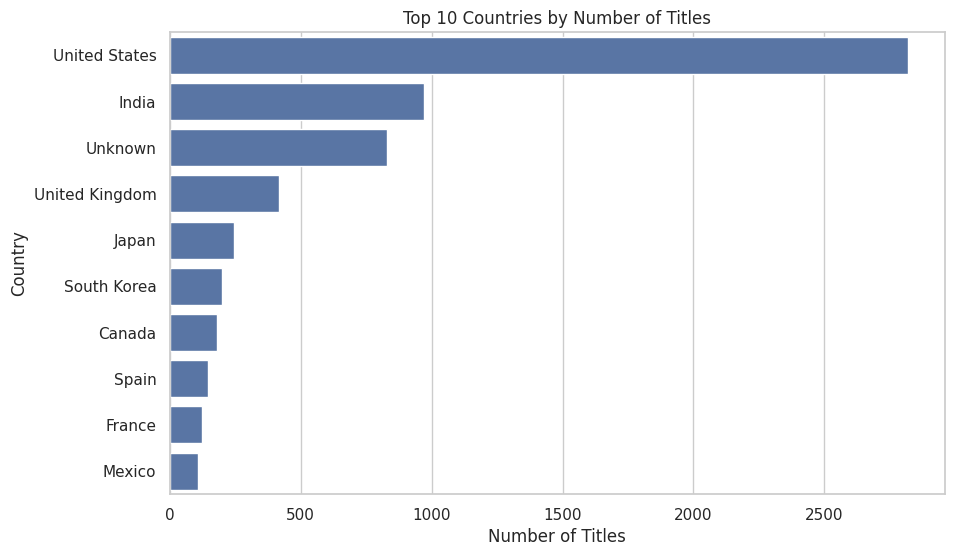

In [ ]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title("Top 10 Countries by Number of Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.savefig("images/top_countries.png")
plt.show()

### 3. How has content production evolved over the years?

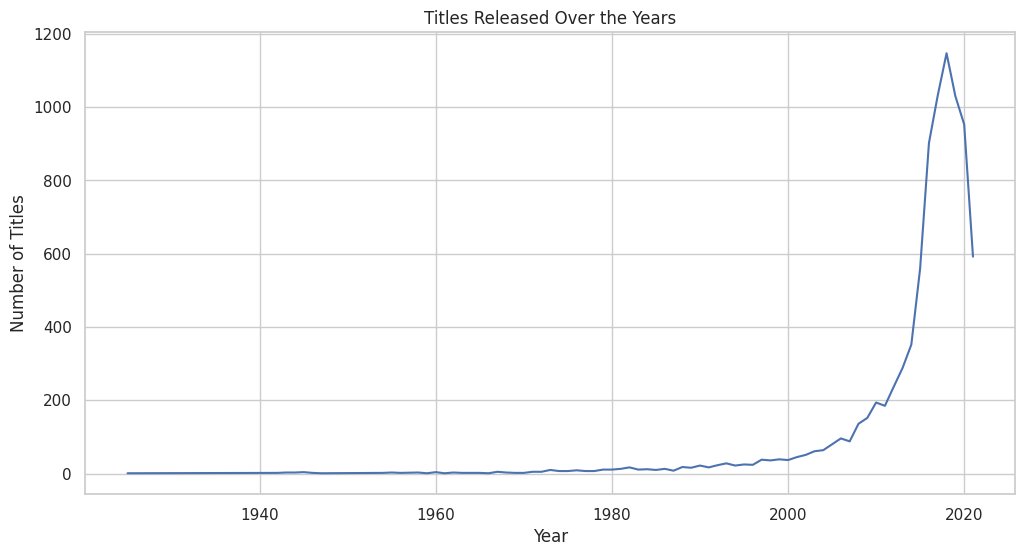

In [ ]:
# Extract year from release_year and date_added
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
release_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=release_counts.index, y=release_counts.values)
plt.title("Titles Released Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.savefig("images/release_year_trend.png")
plt.show()


## Duration

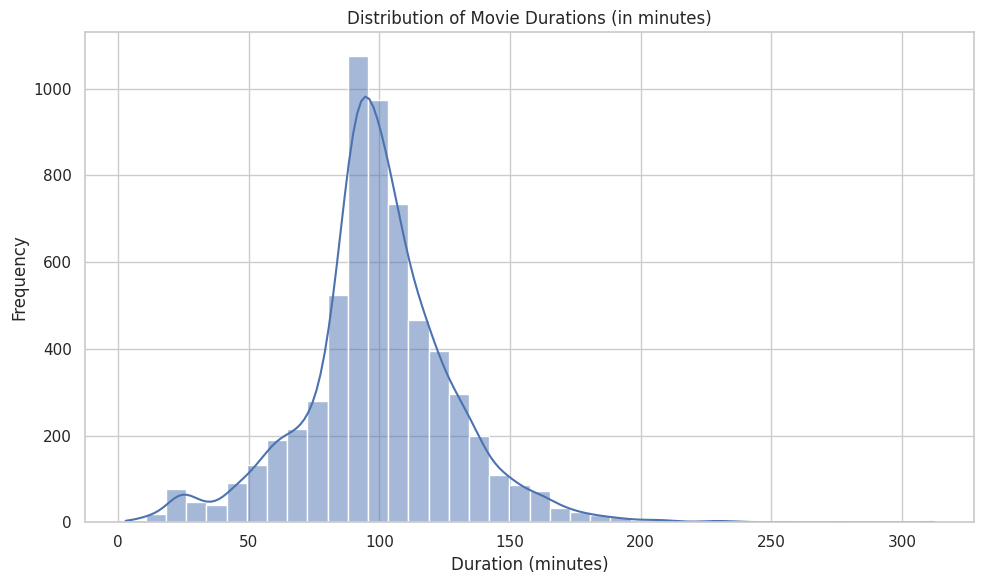

In [ ]:
# get movies dataframe
movies_df = df[df['type'] == 'Movie'].copy()

# Extraer número de minutos
movies_df['duration_min'] = movies_df['duration'].str.extract('(\d+)').astype(float)

# Distribución
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['duration_min'], bins=40, kde=True)
plt.title("Distribution of Movie Durations (in minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("images/movie_duration_distribution.png")
plt.show()


## Genre analysis

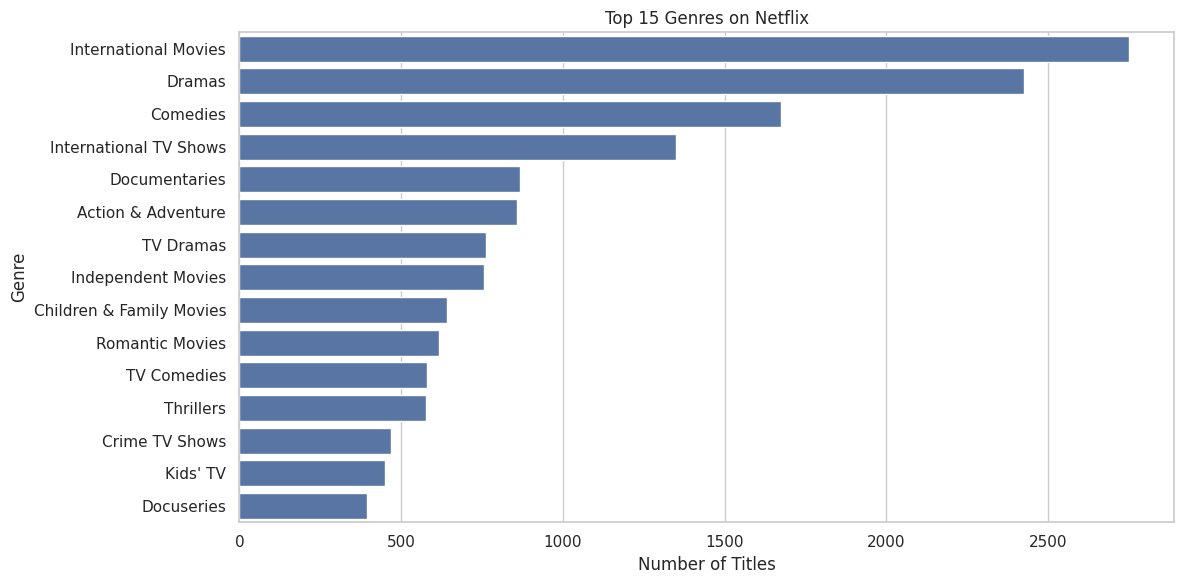

In [ ]:
from collections import Counter

# split all genres in a list
all_genres = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in all_genres for genre in sublist]

# Contar ocurrencias
genre_counts = Counter(flat_genres)

# Convertir a DataFrame para graficar
genre_df = pd.DataFrame(genre_counts.most_common(15), columns=['Genre', 'Count'])

# Visualizar
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Genre', data=genre_df)
plt.title("Top 15 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
os.makedirs("images", exist_ok=True)
plt.savefig("images/top_genres.png")
plt.show()


In [ ]:
# Crear un nuevo DataFrame solo con las columnas relevantes
genres_by_type = df[['type', 'listed_in']].dropna()

# Explode géneros: separarlos en filas
genres_by_type = genres_by_type.assign(genre=genres_by_type['listed_in'].str.split(', '))
genres_by_type = genres_by_type.explode('genre')
genres_by_type['genre'] = genres_by_type['genre'].str.strip()

# Contar combinaciones tipo + género
genre_type_counts = genres_by_type.groupby(['type', 'genre']).size().reset_index(name='count')

# Ver los más comunes por tipo
top_genres_movies = genre_type_counts[genre_type_counts['type'] == 'Movie'].sort_values('count', ascending=False).head(10)
top_genres_tv = genre_type_counts[genre_type_counts['type'] == 'TV Show'].sort_values('count', ascending=False).head(10)


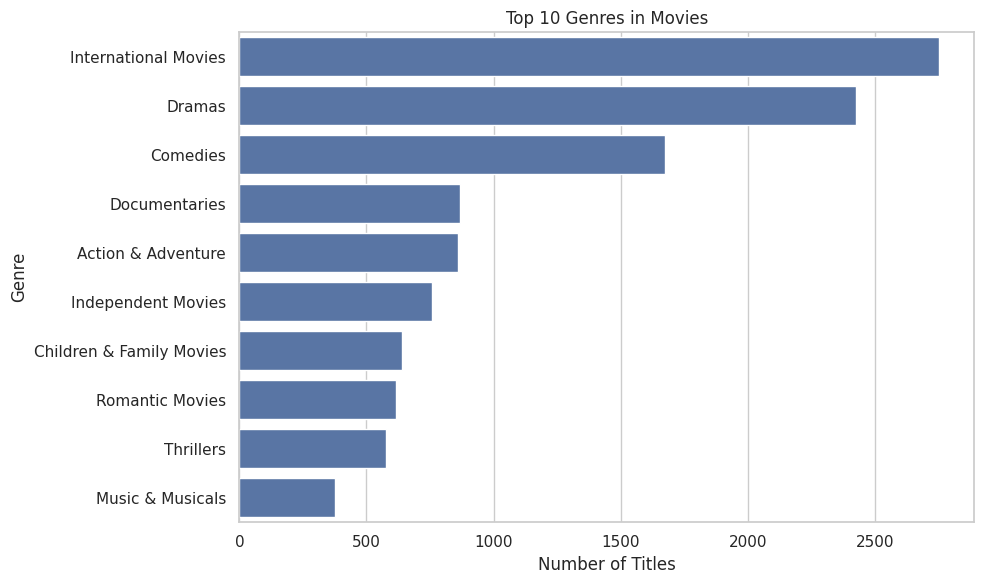

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_genres_movies, x='count', y='genre')
plt.title("Top 10 Genres in Movies")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.savefig("images/top_movie_genres.png")
plt.show()


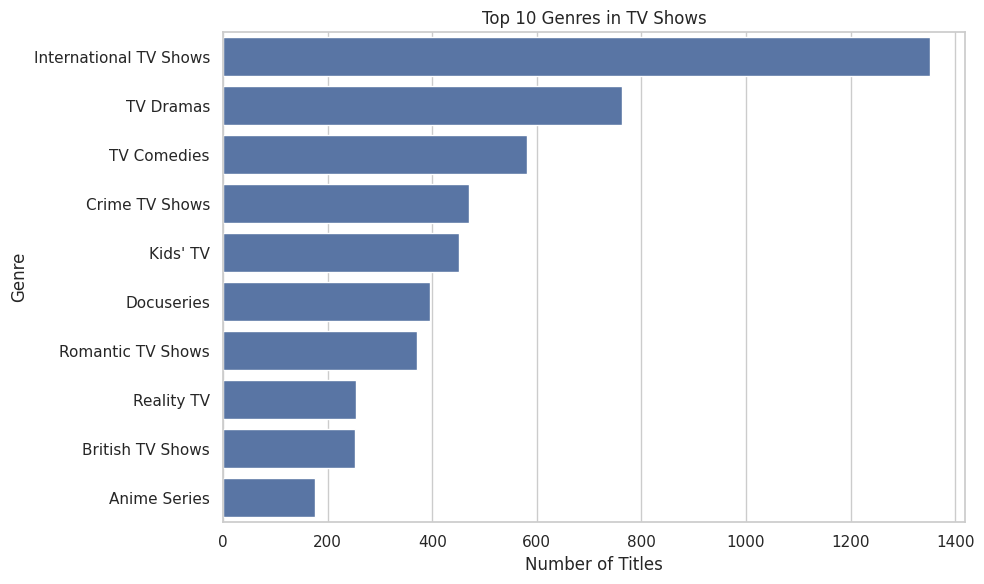

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_genres_tv, x='count', y='genre')
plt.title("Top 10 Genres in TV Shows")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.savefig("images/top_tv_genres.png")
plt.show()

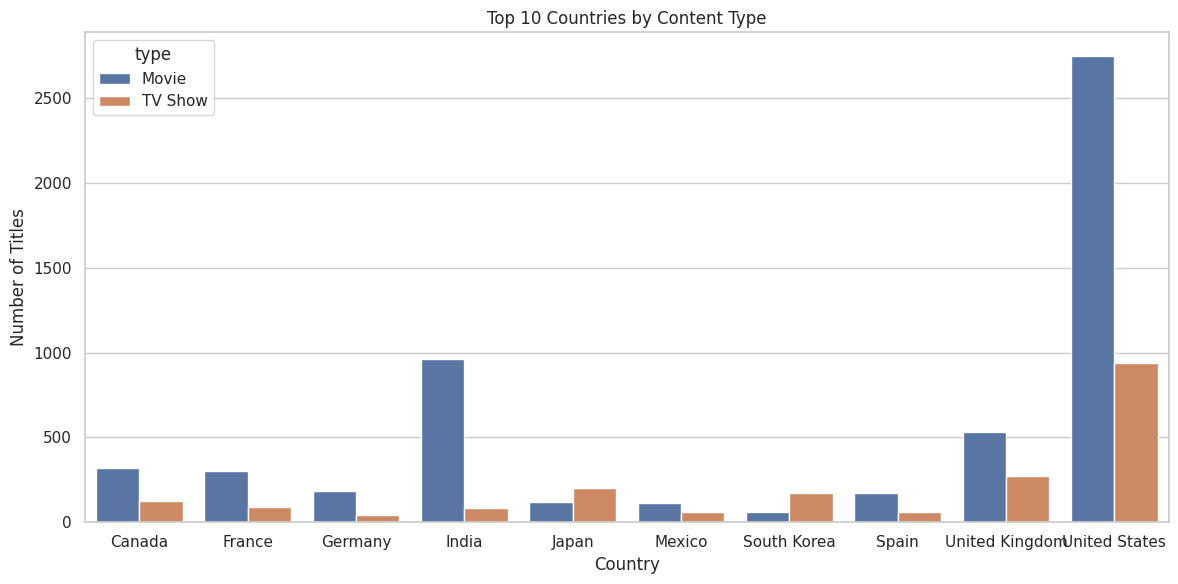

In [ ]:
country_type = df[['country', 'type']].dropna()
country_type = country_type.assign(country=country_type['country'].str.split(', '))
country_type = country_type.explode('country')
country_type['country'] = country_type['country'].str.strip()

# Agrupar por país y tipo
ct_counts = country_type.groupby(['country', 'type']).size().reset_index(name='count')

# Filtrar los 10 países con más contenido total
top_countries = ct_counts.groupby('country')['count'].sum().sort_values(ascending=False).head(10).index

# Filtrar el dataset para esos países
ct_filtered = ct_counts[ct_counts['country'].isin(top_countries)]

# Visualizar
plt.figure(figsize=(12, 6))
sns.barplot(data=ct_filtered, x='country', y='count', hue='type')
plt.title("Top 10 Countries by Content Type")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.savefig("images/top_countries_by_type.png")
plt.show()

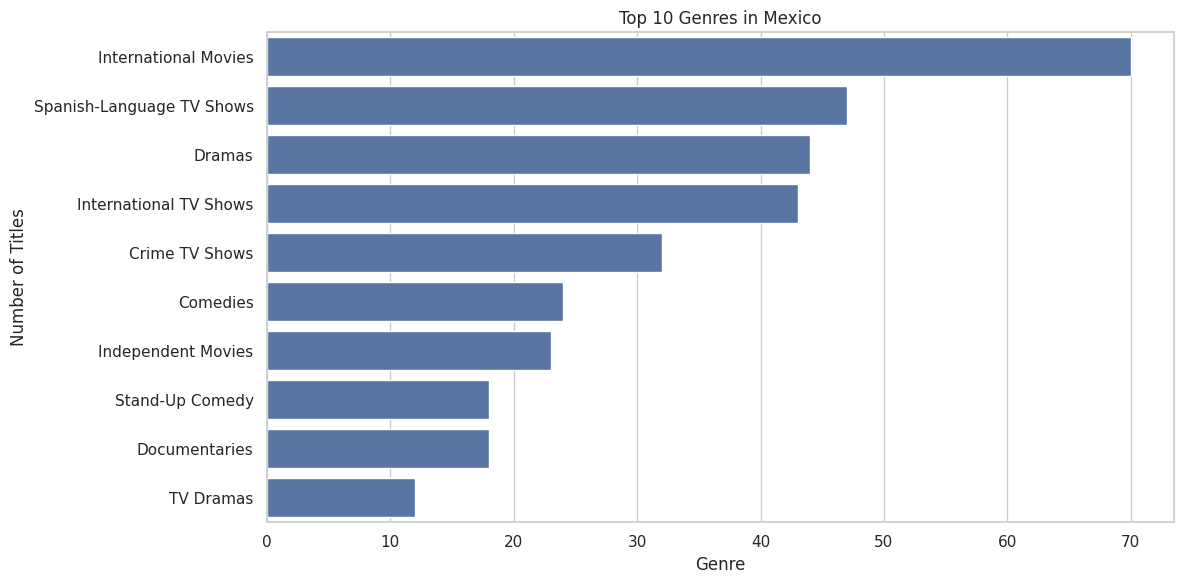

In [ ]:
# Paso 1: Filtrar registros que incluyan Mexico
mx_df = df[df['country'].notna() & df['listed_in'].notna()]  # Evitar errores por NaN
mx_df = mx_df[mx_df['country'].str.contains('Mexico')].copy()

# Paso 2: Separar múltiples géneros
mx_df['genre'] = mx_df['listed_in'].str.split(', ')
mx_df = mx_df.explode('genre')
mx_df['genre'] = mx_df['genre'].str.strip()

# Paso 3: Contar ocurrencias por género
top_mx_genres = mx_df['genre'].value_counts()
top_mx_genres = top_mx_genres.head(10).reset_index()
top_mx_genres.columns = ['genre', 'count']

# show top 10 genres in Mexico
plt.figure(figsize=(12, 6))
sns.barplot(data=top_mx_genres, x='count', y='genre')
plt.title("Top 10 Genres in Mexico")
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.savefig("images/top_genres_in_mexico.png")
plt.show()


## Genre Dominance and Unique Specializations by Country

### Top 10 Countries with the Largest Catalogues

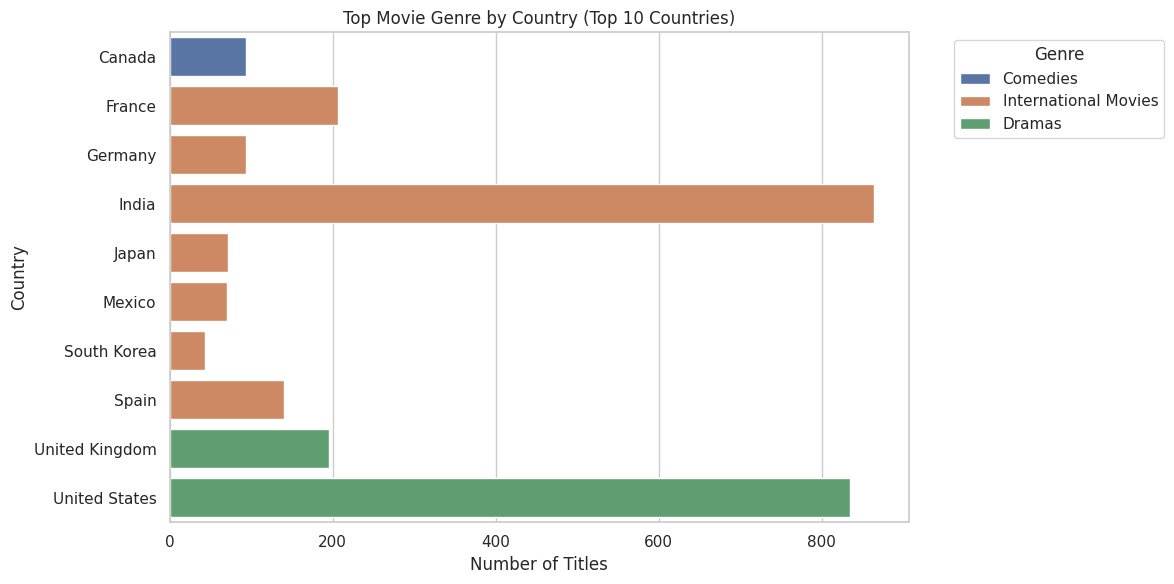

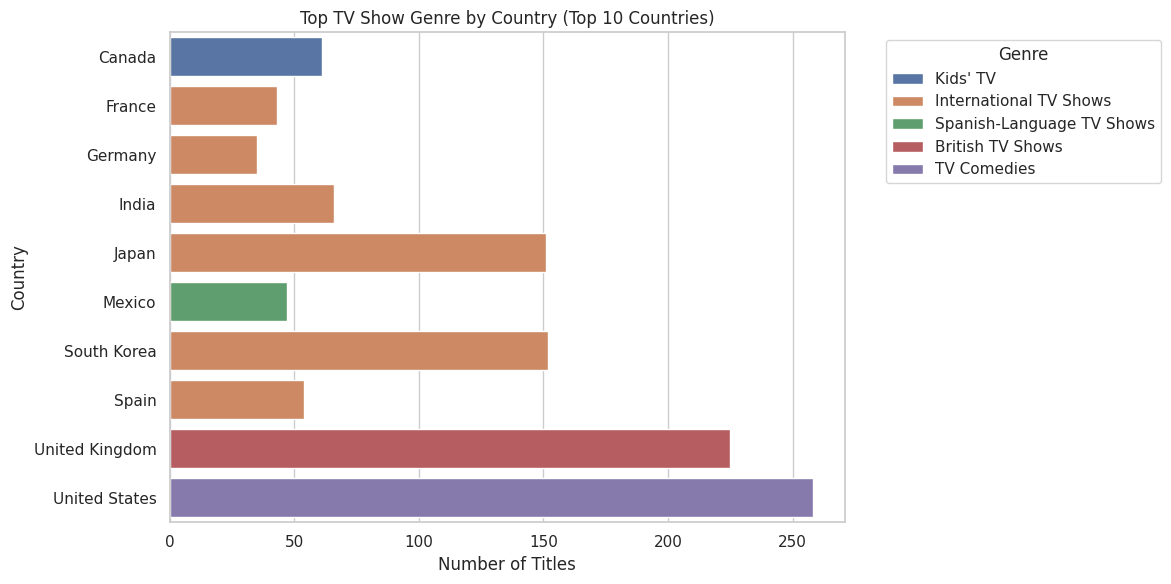

In [ ]:
top_countries = df['country'].value_counts().head(10)

genres_by_country_type = df[['type', 'country','listed_in']].dropna()

# Explode géneros: separarlos en filas
genres_by_country_type = genres_by_country_type.assign(genre=genres_by_country_type['listed_in'].str.split(', '))
genres_by_country_type = genres_by_country_type.assign(country_name=genres_by_country_type['country'].str.split(', '))
genres_by_country_type = genres_by_country_type.explode('genre')
genres_by_country_type = genres_by_country_type.explode('country_name')
genres_by_country_type['genre'] = genres_by_country_type['genre'].str.strip()
genres_by_country_type['country_name'] = genres_by_country_type['country_name'].str.strip()

# Contar combinaciones tipo + pais + género
genre_country_type_counts = genres_by_country_type.groupby(['type', 'country_name', 'genre']).size().reset_index(name='count')


# Filtrar los 10 países con más contenido total
top_countries = genre_country_type_counts.groupby('country_name')['count'].sum().sort_values(ascending=False).head(10).index

# Filtrar el dataset para esos países
top_data = genre_country_type_counts[genre_country_type_counts['country_name'].isin(top_countries)]

# Obtener el género más común por país y tipo
top_genres_per_country_type = top_data.loc[
    top_data.groupby(['country_name', 'type'])['count'].idxmax()
].reset_index(drop=True)

movies_df = top_genres_per_country_type[top_genres_per_country_type['type'] == 'Movie']
tvshows_df = top_genres_per_country_type[top_genres_per_country_type['type'] == 'TV Show']

# --- GRAFICO 1: Películas ---
plt.figure(figsize=(12, 6))
sns.barplot(data=movies_df, x='count', y='country_name', hue='genre')
plt.title("Top Movie Genre by Country (Top 10 Countries)")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("images/top_movie_genres_by_country.png", dpi=300)
plt.show()

# --- GRAFICO 2: Series ---
plt.figure(figsize=(12, 6))
sns.barplot(data=tvshows_df, x='count', y='country_name', hue='genre')
plt.title("Top TV Show Genre by Country (Top 10 Countries)")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("images/top_tvshow_genres_by_country.png", dpi=300)
plt.show()

### Rare or Niche Genres

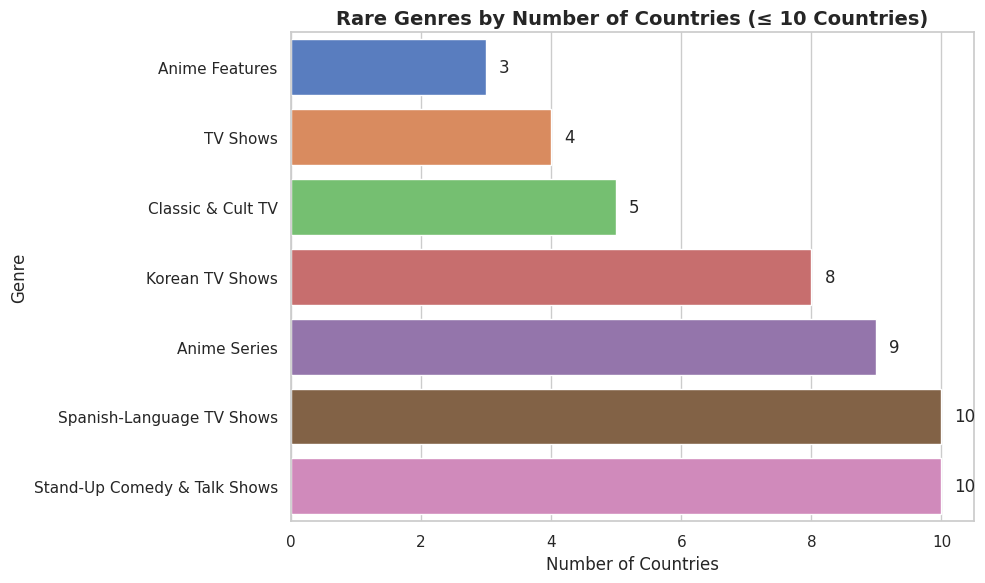

In [ ]:
genres_by_country = df[['country', 'listed_in']].dropna()
genres_by_country = genres_by_country.assign(
    genre=genres_by_country['listed_in'].str.split(', '),
    country_name=genres_by_country['country'].str.split(', ')
)
genres_by_country = genres_by_country.explode('genre').explode('country_name')
genres_by_country['genre'] = genres_by_country['genre'].str.strip()
genres_by_country['country_name'] = genres_by_country['country_name'].str.strip()

genre_country_count = genres_by_country.groupby('genre')['country_name'].nunique()

# Géneros que solo aparecen en 10 paises o menos
rare_genres = genre_country_count[genre_country_count <= 10].sort_values()

rare_genres_df = rare_genres.reset_index().rename(columns={'country_name': 'num_countries'})

# Ordenar para mejor visualización
rare_genres_df = rare_genres_df.sort_values('num_countries', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=rare_genres_df,
    x='num_countries',
    y='genre',
    hue='genre',
    palette='muted'
)

plt.title("Rare Genres by Number of Countries (≤ 10 Countries)", fontsize=14, weight='bold')
plt.xlabel("Number of Countries")
plt.ylabel("Genre")

# Etiquetas de número en las barras (opcional)
for i, row in rare_genres_df.iterrows():
    plt.text(row['num_countries'] + 0.2, i, str(row['num_countries']), va='center')

plt.tight_layout()
plt.savefig("images/rare_genres_by_country_count.png", dpi=300)
plt.show()

In [ ]:
rare_genre_names = rare_genres.index.tolist()

# Filtrar solo filas con géneros raros
rare_genre_locations = genres_by_country[genres_by_country['genre'].isin(rare_genre_names)]

# Agrupar por género y juntar los países
rare_genre_country_list = (
    rare_genre_locations
    .groupby('genre')['country_name']
    .unique()
    .reset_index()
    .rename(columns={'country_name': 'countries'})
)

# Unir con rare_genres para tener el número de países
rare_genre_data = rare_genre_country_list.merge(
    rare_genres.reset_index().rename(columns={'country_name': 'num_countries'}),
    on='genre'
)

import plotly.express as px

fig = px.bar(
    rare_genre_data.sort_values('num_countries'),
    x='num_countries',
    y='genre',
    orientation='h',
    text='num_countries',
    hover_data={'countries': True},
    labels={'num_countries': 'Number of Countries', 'genre': 'Genre'},
    title='Rare Genres by Country (Appearing in 10 or Fewer Countries)'
)

fig.update_traces(marker_color='teal', textposition='outside')
fig.update_layout(
    yaxis=dict(tickfont=dict(size=12)),
    xaxis=dict(tickfont=dict(size=12)),
    title=dict(x=0.5),
    plot_bgcolor='white'
)

fig.show()


## 🎯 Genre Analysis and Content Insights

### 🔍 Overview
To understand the content distribution on Netflix, we explored the `listed_in` column, which lists one or more genres per title. Since titles can belong to multiple genres, we normalized and expanded the data to analyze genre frequency both globally and by content type (`Movie` vs `TV Show`), as well as by country.

---

### 🎬 Top Genres on Netflix
We began by extracting individual genres from all titles and counting their occurrences across the dataset.

**Top 5 Genres Overall:**
- Documentaries
- Dramas
- Comedies
- International Movies
- Children & Family Movies

These genres dominate the platform, highlighting Netflix’s focus on diverse narratives, global appeal, and family-oriented content.

---

### 📺 Content Type vs Genre
We then analyzed how genre distribution differs between **Movies** and **TV Shows**:

#### 🎥 Top Genres in Movies:
- Dramas
- Comedies
- Documentaries
- Action & Adventure
- Independent Movies

#### 📡 Top Genres in TV Shows:
- International TV Shows
- TV Dramas
- TV Comedies
- Reality TV
- Crime TV Shows

This shows that **TV content is more serialized and region-specific**, while **movies tend to follow traditional cinematic genres**.

---

### 🌍 Country × Type Cross Analysis
To explore regional trends, we exploded the `country` field and analyzed the number of titles by country and content type.

Key insights:
- **United States** leads in both movies and TV shows.
- **India** and **United Kingdom** have a strong focus on movies.
- **South Korea** dominates in TV content, especially dramas and reality shows.

This analysis helps reveal production patterns and audience preferences by region.

---

### 🇲🇽 Case Study: Top Genres in Mexico
We isolated all titles that include **Mexico** in their country metadata and extracted the most common genres.

**Top 10 Genres in Mexican Content:**
*(visualized in the corresponding chart)*

This shows Mexico’s strong presence in:
- Dramas
- Documentaries
- Comedies
- International content

This breakdown helps understand regional production focus and can guide localization strategies or content licensing decisions.

---

## 📌 Observations & Takeaways

- Netflix offers a **broad and overlapping genre taxonomy**, especially due to multi-label entries.
- **TV shows lean toward serialized and regional formats**, while **movies favor global, standalone genres**.
- **Country-level analysis reveals distinct production cultures**: e.g., South Korea = drama-heavy TV; India = movie-focused catalog.
- This genre and regional profiling supports applications in:
  - Recommendation systems
  - Market segmentation
  - Content acquisition strategies

> This analysis combines data cleaning, normalization, and visualization to generate actionable business intelligence from Netflix’s content metadata.



## ✅ Conclusion

This project provided a hands-on opportunity to clean, transform, and analyze Netflix's content catalog using Python and pandas. By focusing on genre and country metadata, we extracted meaningful insights into how content is produced and labeled across different regions and formats.

From multi-genre entries to multi-country collaborations, the dataset required careful normalization and expansion. The use of `.explode()`, string operations, and grouped visualizations enabled us to answer questions such as:

- What are the most dominant genres on the platform?
- How do content trends differ between movies and TV shows?
- Which countries are major content producers, and in what formats?
- What kind of content does Mexico (or any specific country) contribute most to the catalog?

We also created clear and exportable visualizations to support our findings, which can be used in business intelligence reports or content strategy discussions.

---

### 💼 Skills Demonstrated:
- Data cleaning (missing values, string parsing, multi-label fields)
- Data transformation using pandas (`explode`, `groupby`, `value_counts`)
- EDA with visual storytelling (bar charts, grouped comparisons)
- Real-world scenario thinking (localization, genre profiling, regional market analysis)

> This type of genre and country-based breakdown is valuable not just for academic purposes, but also for teams involved in recommendation engines, international content licensing, and user segmentation.



## 📁 Download All Generated Images

The following cell compresses all plots saved in the `/images/` folder into a single `.zip` file for easy download.


In [ ]:
# Zip all images into a single downloadable file
from zipfile import ZipFile
import os

# Define folder and zip name
folder_path = "images"
zip_filename = "netflix_charts.zip"

# Create zip file
with ZipFile(zip_filename, "w") as zipf:
    for root, _, files in os.walk(folder_path):
        for file in files:
            zipf.write(os.path.join(root, file))

# Create download link
from google.colab import files
files.download(zip_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Replace these with your info
REPO = "luisfernandoc/netflix_data_analysis"
BRANCH = "main"
github_token = "your_token_here"

!git config --global user.email "lfer_ca@hotmail.com"
!git config --global user.name "Luis Fernando Cuevas"

# Clona el repositorio con autenticación
!git clone https://{github_token}@github.com/{REPO}.git

import shutil

# Mover imágenes al repositorio clonado
shutil.copytree("images", "netflix_data_analysis/images", dirs_exist_ok=True)

%cd netflix_data_analysis

!git add images/
!git commit -m "Add generated charts from Colab"
!git push origin {BRANCH}


Cloning into 'netflix_data_analysis'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 16 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (16/16), 1.74 MiB | 7.85 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/netflix_data_analysis/netflix_data_analysis/netflix_data_analysis/netflix_data_analysis/netflix_data_analysis
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
Everything up-to-date
